# Redes Neurais Convolucionais com Keras



## 1. Objetivo

Compilar e treinar uma RNA convolucional com o Keras.

Apresentar como visualizar as saídas das camadas convolucionais de uma RNA.

Apresentar o que uma RNA convolucional realiza nas suas camadas.

## 2. Conjunto de dados

Será resolvido um problema de classificação multiclasse usando o conjunto de dados MINIST de dígitos.

### 2.1 Importação das principais bibliotecas

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.16.2


### 2.2 Importação do conjunto de dados MNIST de dígitos

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Dimensão dos dados de entrada de treinamento =', x_train.shape)
print('Dimensão dos dados de entrada de teste =', x_test.shape)
print('Dimensão dos dados de saída de treinamento =', y_train.shape)
print('Dimensão dos dados de saída de teste =', y_test.shape)

Dimensão dos dados de entrada de treinamento = (60000, 28, 28)
Dimensão dos dados de entrada de teste = (10000, 28, 28)
Dimensão dos dados de saída de treinamento = (60000,)
Dimensão dos dados de saída de teste = (10000,)


É uma figura do número 4


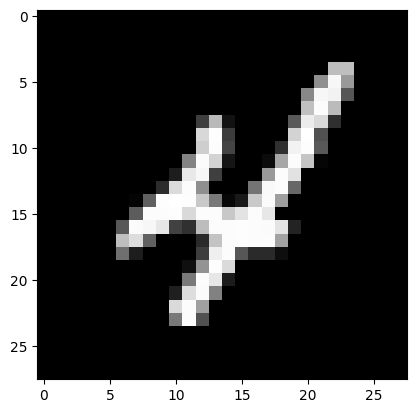

In [29]:
# Exemplo de uma imagem
index = 9
plt.imshow(x_train[index], cmap='gray', vmin=0, vmax=255)
print ("É uma figura do número " + str(y_train[index]))

### 2.3 Inclusão do eixo de cores e normalização das imagens

In [30]:
# Determina número de exemplos
m = x_train.shape[0]

# Inclui eixo de cores nas imagens
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

# Determina dimensões das imagens
img_dim = x_train.shape[1:]
print('Dimensão das imagens =', img_dim)

# Normaliza imagens
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

print('Dimensão dos dados de entrada de treinamento =', x_train.shape)
print('Dimensão dos dados de entrada de teste =', x_test.shape)

Dimensão das imagens = (28, 28, 1)
Dimensão dos dados de entrada de treinamento = (60000, 28, 28, 1)
Dimensão dos dados de entrada de teste = (10000, 28, 28, 1)


In [31]:
print(np.min(x_train), np.max(x_train))

-1.0 1.0


### 2.4 Codificação one-hot das saídas

In [32]:
print('Classes das imagens:', y_train[:10])

Classes das imagens: [5 0 4 1 9 2 1 3 1 4]


In [33]:
# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print('Dimensão dos dados de saída do conjunto de treinamento: ', y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', y_test_hot.shape)
print('Classe numérica:', y_train[:5])
print('Classe como vetor one-hot:\n', y_train_hot[:5])

Dimensão dos dados de saída do conjunto de treinamento:  (60000, 10)
Dimensão dos dados de saída do conjunto de teste:  (10000, 10)
Classe numérica: [5 0 4 1 9]
Classe como vetor one-hot:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 3.Configuração de uma RNA convolucional

Irei usar como base a arquitetura da rede LeNet-5


### 3.1 Rede LeNet-5

Como exemplo a rede LeNet-5, que é usada para classificação multi-classe, possui a seguinte arquitetura:

- Dimensão das imagens de entrada: 32x32x3;


- Camada convolucional: Ativação ReLu - Extração de características;


- Camada de “max-pooling”: serve para realizar a redução de dimensionalidade das características extraídas pelas camadas convolucionais anteriores;


- Camada convolucional: Ativação ReLu;


- Camada de “max-pooling”;


- Camada de “flattening” : linearização das características extraídas;


- Camada densa: Processamento das características linearizadas ;


- Camada densa;


- Camada softmax: $n^{[7]} = 10$ para a classificação das imagens em 10 classes diferentes, softmax.



In [34]:
# Parte Convolucional da rede neural
from tensorflow.keras import layers
from tensorflow.keras import models

rna = models.Sequential()
rna.add(layers.Conv2D(8, (5, 5), strides=1, padding='valid', activation='relu', input_shape=img_dim))
rna.add(layers.MaxPooling2D((2, 2)))
rna.add(layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'))
rna.add(layers.MaxPooling2D((2, 2)))

rna.summary()

c:\Projetos\Classificação de imagem\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,424 (13.38 KB)

 Trainable params: 3,424 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# parte densa da rede neural
rna.add(layers.Flatten())
rna.add(layers.Dense(120, activation='relu'))
rna.add(layers.Dense(84, activation='relu'))
rna.add(layers.Dense(10, activation='softmax'))

rna.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,278 (176.87 KB)

 Trainable params: 45,278 (176.87 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Importa função para fazer gráfico de RNAs
from tensorflow.keras.utils import plot_model

# Cria um arquivo com o esquema da Rede Neural
plot_model(rna, to_file='rna.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 4. Compilação e treinamento


In [37]:
rna.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Na célula abaixo é realizado o treinamento da RN com 20 épocas de treinamento.

In [38]:
history = rna.fit(x_train, y_train_hot, epochs=20, verbose=1, batch_size=1000, validation_data=(x_test, y_test_hot))

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5154 - loss: 1.5775 - val_accuracy: 0.9214 - val_loss: 0.2792
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9264 - loss: 0.2485 - val_accuracy: 0.9576 - val_loss: 0.1460
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9555 - loss: 0.1477 - val_accuracy: 0.9690 - val_loss: 0.1023
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9675 - loss: 0.1043 - val_accuracy: 0.9749 - val_loss: 0.0825
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9747 - loss: 0.0839 - val_accuracy: 0.9798 - val_loss: 0.0696
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9789 - loss: 0.0687 - val_accuracy: 0.9798 - val_loss: 0.0622
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9814 - val_loss: 0.0583
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9828 - loss: 0.0545 - val_accuracy: 0.9840 - val_loss

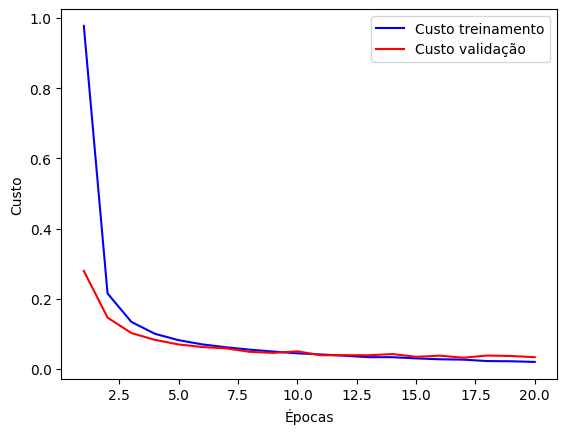

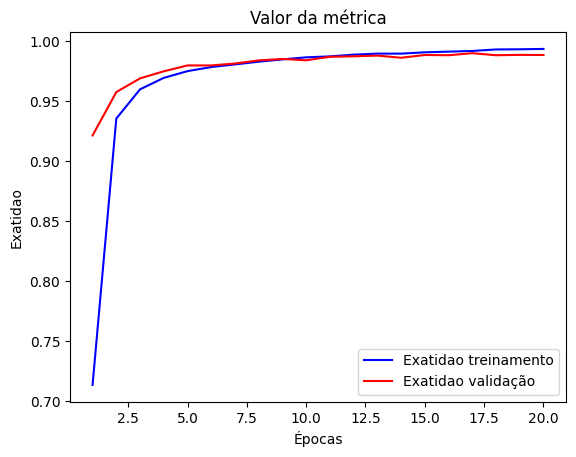

In [39]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores
custo = history_dict['loss']
acc = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'b', label='Custo treinamento')
plt.plot(epocas, val_custo, 'r', label='Custo validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'b', label='Exatidao treinamento')
plt.plot(epocas, val_acc, 'r', label='Exatidao validação')
plt.title('Valor da métrica')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

## 5. Avaliação e teste da RN treinada


### 5.1 Avaliação do desempenho

In [40]:
# Avaliação da RN para os dados de treinamento e teste
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9938 - loss: 0.0185
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9858 - loss: 0.0440


### 5.2 Avaliação das previsões


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
[1.9597476e-06 1.1227373e-08 4.3469940e-06 4.2366123e-06 2.4116147e-07
 4.6268749e-04 9.9888057e-01 1.1831081e-09 6.4553157e-04 3.5708791e-07]


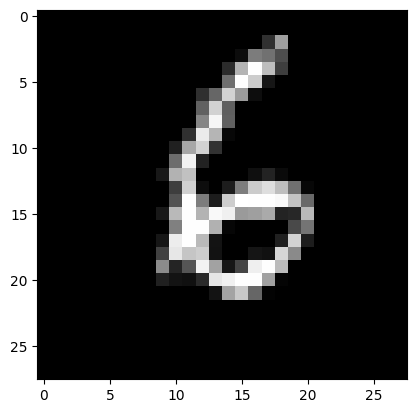

classe prevista = 6
classe real = 6


In [41]:
# Calculo das previsões da RNA
y_pred = rna.predict(x_test)

# Seleção da imagem
index = 2000
print(y_pred[index])

# Cálculo das classes previstas
classe = np.argmax(y_pred, axis=1) # apenas para a visualização das probabilidades

# Exemplo de uma imagem dos dados de teste
plt.imshow(np.squeeze(x_test[index]), cmap='gray')
plt.show()
print ("classe prevista = " + str(np.squeeze(classe[index])))
print ("classe real = " + str(np.squeeze(y_test[index])))

Cálculo das previsões da RNA para as imagens dos dados de teste e verificação se algumas dessas previsões estão corretas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step


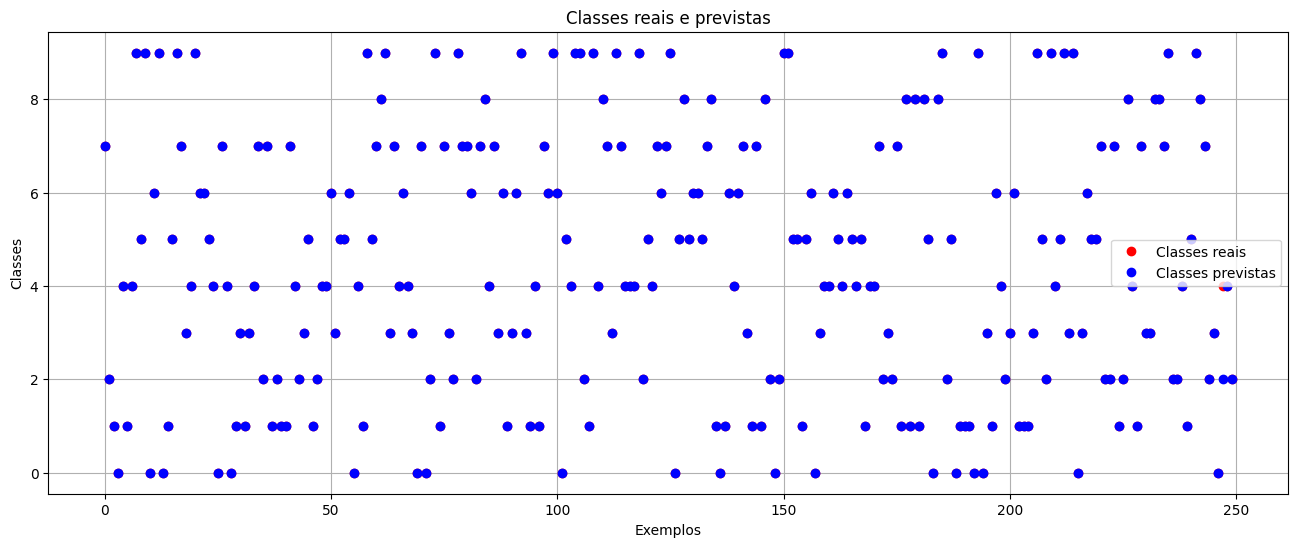

In [42]:
# Calculo das previsões da RNA
y_test_prev = rna.predict(x_test)

# Cálculo das classes previstas
classe = np.argmax(y_test_prev, axis=1)

# Gráfico das classes reais e previstas (100 primeiros exemplos)
plt.figure(figsize=(16, 6))
plt.plot(y_test[:250], 'ro', label='Classes reais')
plt.plot(classe[:250], 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.grid()
plt.legend()
plt.show()